Using TensorFlow backend.
/usr/src/app/koda/edge/network.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  self.model = Model(input = inputs, output = conv10)


True


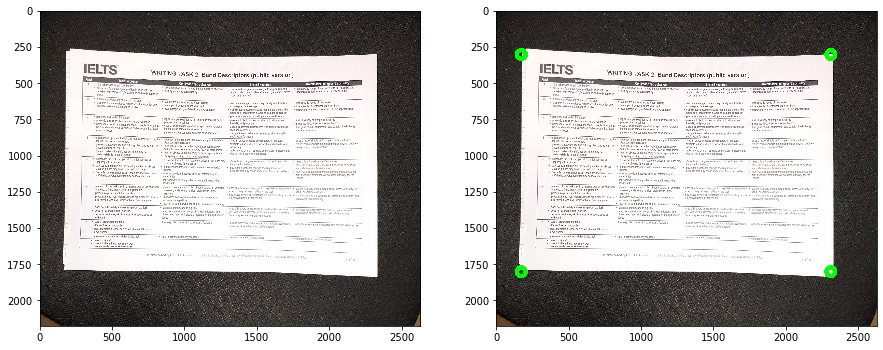

True


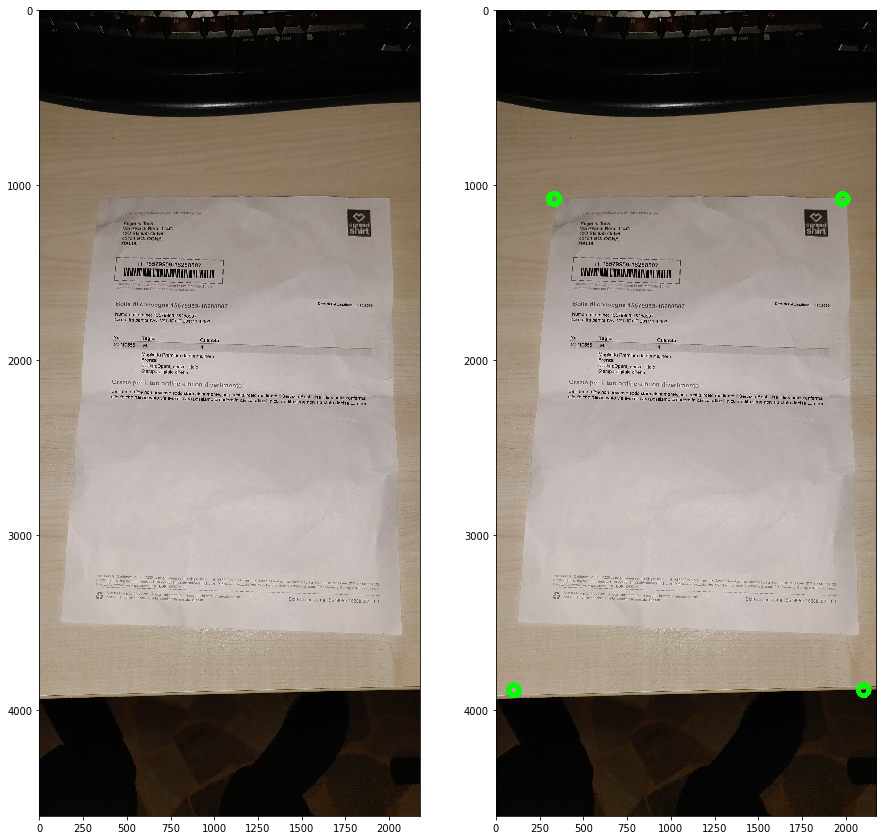

True


KeyboardInterrupt: 

In [1]:
from koda.corners.detector import CornersDetectorByEdges, CornersNotFound
from matplotlib import pyplot as plt
import cv2
import numpy as np
%matplotlib inline

cdetector = CornersDetectorByEdges()

for i in range(7):
    fig, axes = plt.subplots(1, 2, figsize=(15,15))
    file = 'dataset/IMG_%d.jpg' % i
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  
    
    try:
        corners = cdetector.find_corners(img)
        print(cdetector.timed_out)
    except CornersNotFound as e:
        print(str(e))
        continue

    im_corners = img.copy()
    for x,y in corners:
        cv2.circle(im_corners, (x,y), 30, (0, 255, 0), 30)
        
    axes[1].imshow(cv2.cvtColor(im_corners, cv2.COLOR_BGR2RGB))
    plt.show()